In [1]:
%pip install pandas flask flask-cors scikit-learn matplotlib seaborn joblib
%pip install missingno
%pip install statsmodels

  Using cached flask_cors-6.0.1-py3-none-any.whl.metadata (5.3 kB)
Using cached flask_cors-6.0.1-py3-none-any.whl (13 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns #ignore
import statsmodels.api as sm #ignore
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

In [2]:
# read the dataset from dir
df = pd.read_csv("diabetes_dataset.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      119            106             21       35  19.3   
1            3       82             76             45      121  42.4   
2           12      129            104             44      131  42.6   
3           14      126             82             21      138  39.1   
4           10      105            117             16      217  18.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.32   60        1  
1                      1.91   39        0  
2                      1.28   73        0  
3                      0.83   21        0  
4                      1.28   25        0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               500 non-null    int64  
 1   Glucose                   500 non-null    int64  
 2   BloodPressure             500 non-null    int64  
 3   SkinThickness             500 non-null    int64  
 4   Insulin                   500 non-null    int64  
 5   BMI                       500 non-null    float64
 6   DiabetesPedigreeFunction  500 non-null    float64
 7   Age                       500 non-null    int64  
 8   Outcome                   500 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 35.3 KB


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# independent feature->'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
# dependent feature-> outcome

# descriptive statistics of the dataset
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   500.000000  500.000000     500.000000     500.000000  500.000000   
mean      6.846000  133.908000      85.652000      34.356000  145.964000   
std       4.367199   37.711641      20.479789      14.569207   74.757957   
min       0.000000   70.000000      50.000000      10.000000   16.000000   
25%       3.000000  102.000000      68.000000      21.000000   83.750000   
50%       7.000000  133.000000      86.000000      34.000000  146.000000   
75%      11.000000  167.000000     104.000000      47.000000  205.250000   
max      14.000000  199.000000     121.000000      59.000000  275.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  500.000000                500.000000  500.000000  500.000000  
mean    31.300800                  1.333180   50.442000    0.496000  
std      7.963957                  0.695634   17.478949    0.500485  
min     18.000000                  0.100000   21.000000    0.000000  
25%     24.275000                  0.740000   36.000000    0.000000  
50%     30.900000                  1.380000   50.000000    0.000000  
75%     38.500000                  1.930000   67.000000    1.000000  
max     45.000000                  2.500000   79.000000    1.000000

In [6]:
# (row, columns)
df.shape

(500, 9)

In [7]:
# distribution of outcome variable
df.Outcome.value_counts()*100/len(df)

Outcome
0    50.4
1    49.6
Name: count, dtype: float64

In [8]:
df['Outcome'].value_counts()*100/len(df)

Outcome
0    50.4
1    49.6
Name: count, dtype: float64

In [9]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="black")

<Axes: xlabel='Age', ylabel='Count'>

In [10]:
df['Age'].max()

79

In [11]:
df['Age'].min()

21

In [12]:
print("MAX AGE: "+str(df['Age'].max()))
print("MIN AGE: "+str(df['Age'].min()))

MAX AGE: 79
MIN AGE: 21


In [36]:
# density graph
# 4*2=8
# columns=2 figure
# having 4 row

# [0,0], [0,1]
# [1,0], [1,1]
# [2,0], [2,1]
# [3,0], [3,1]

fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")

<Axes: xlabel='Age', ylabel='Density'>

In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
df.groupby("Outcome").agg({'Pregnancies':'mean'})

Pregnancies
Outcome             
0           6.599206
1           7.096774

In [16]:
df.groupby("Outcome").agg({'Pregnancies':'max'})

Pregnancies
Outcome             
0                 14
1                 14

In [17]:
df.groupby("Outcome").agg({'Glucose':'mean'})

Glucose
Outcome            
0        132.626984
1        135.209677

In [18]:
df.groupby("Outcome").agg({'Glucose':'max'})

Glucose
Outcome         
0            199
1            199

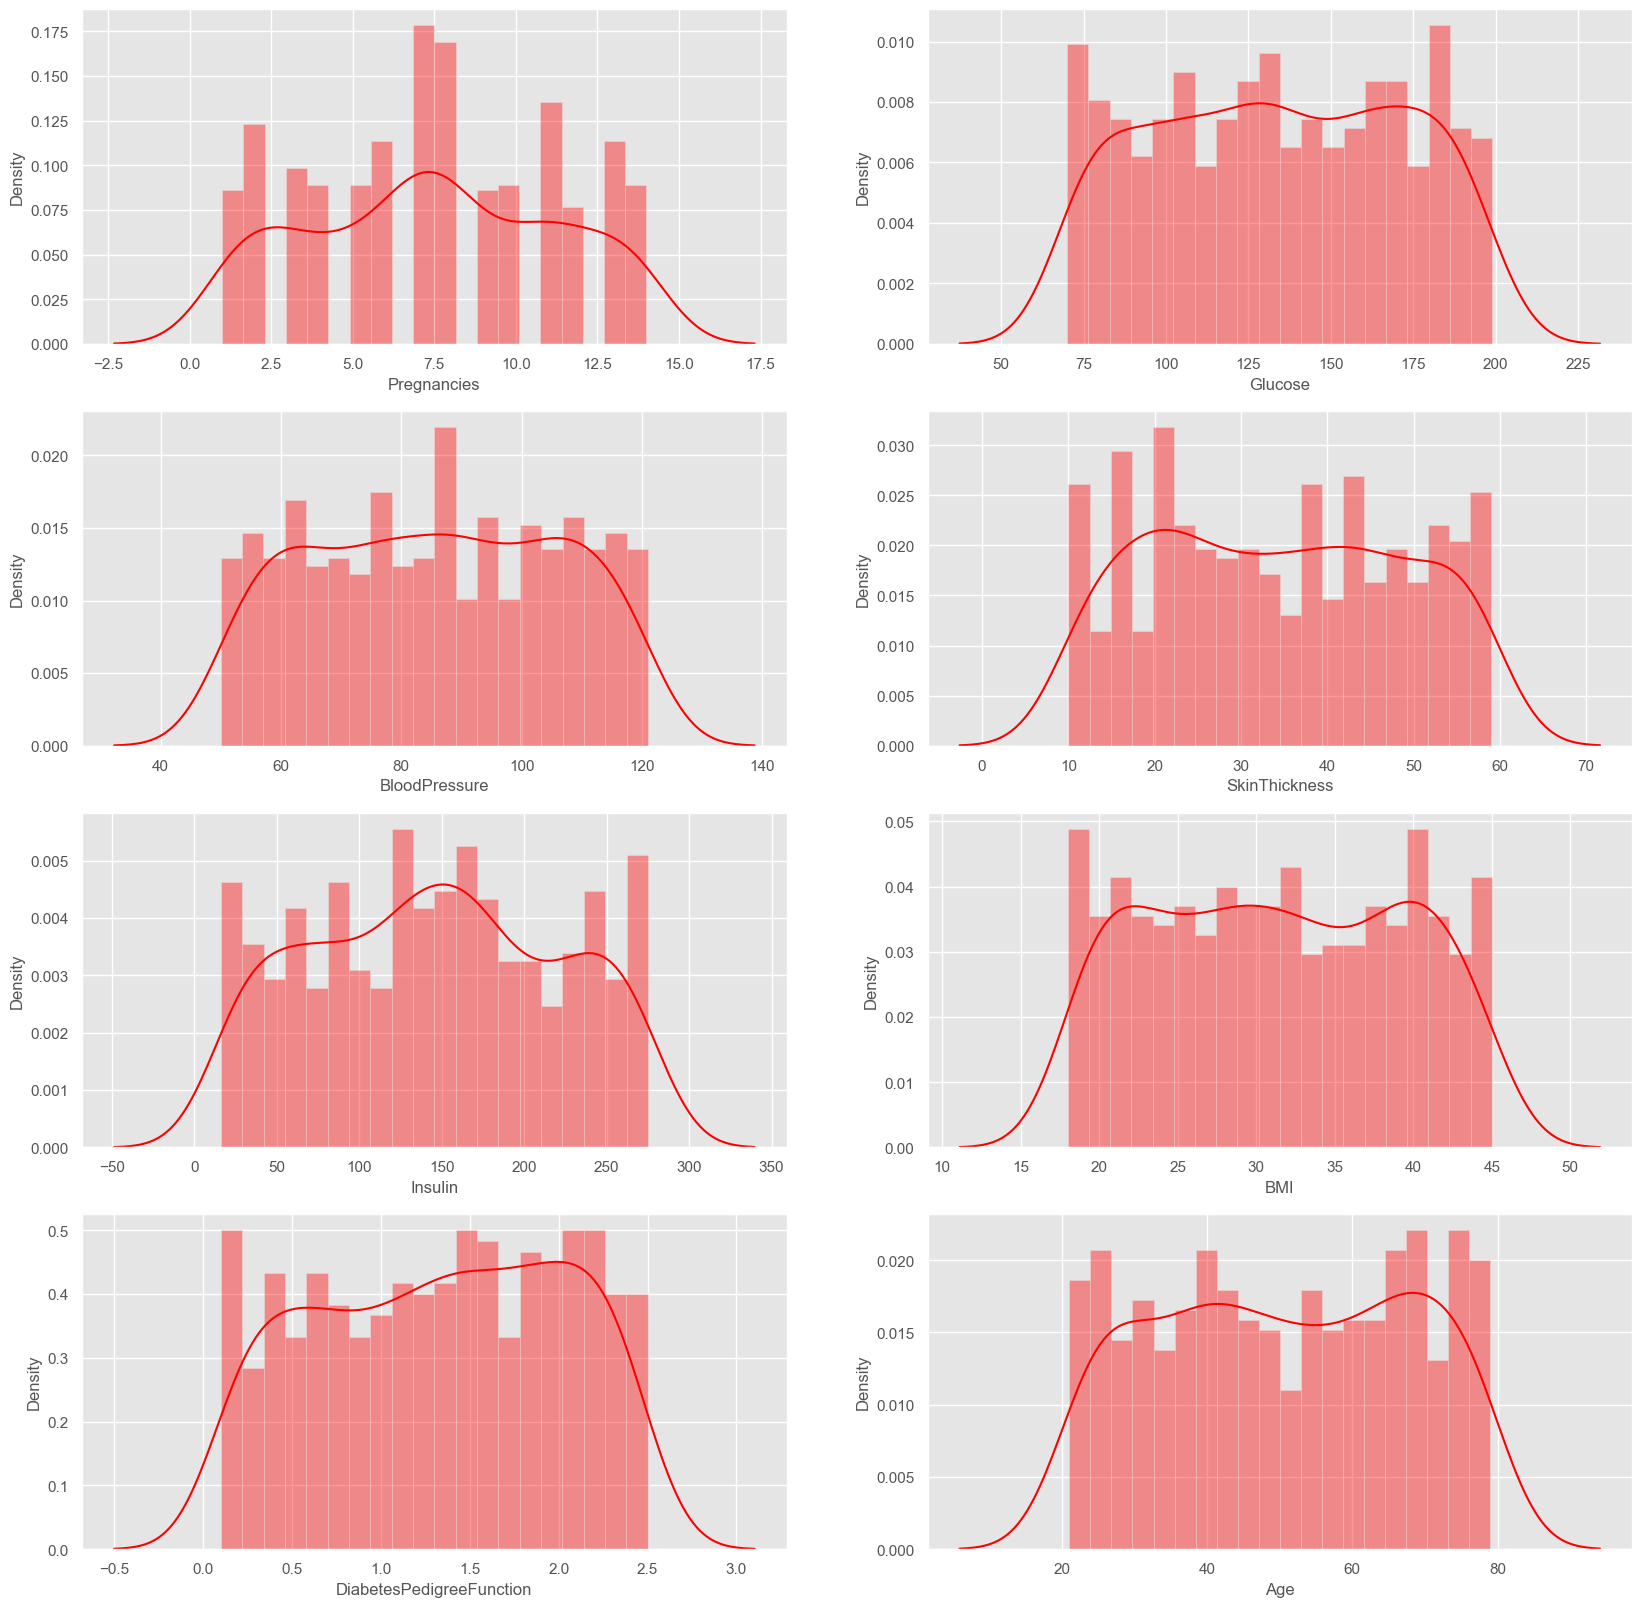

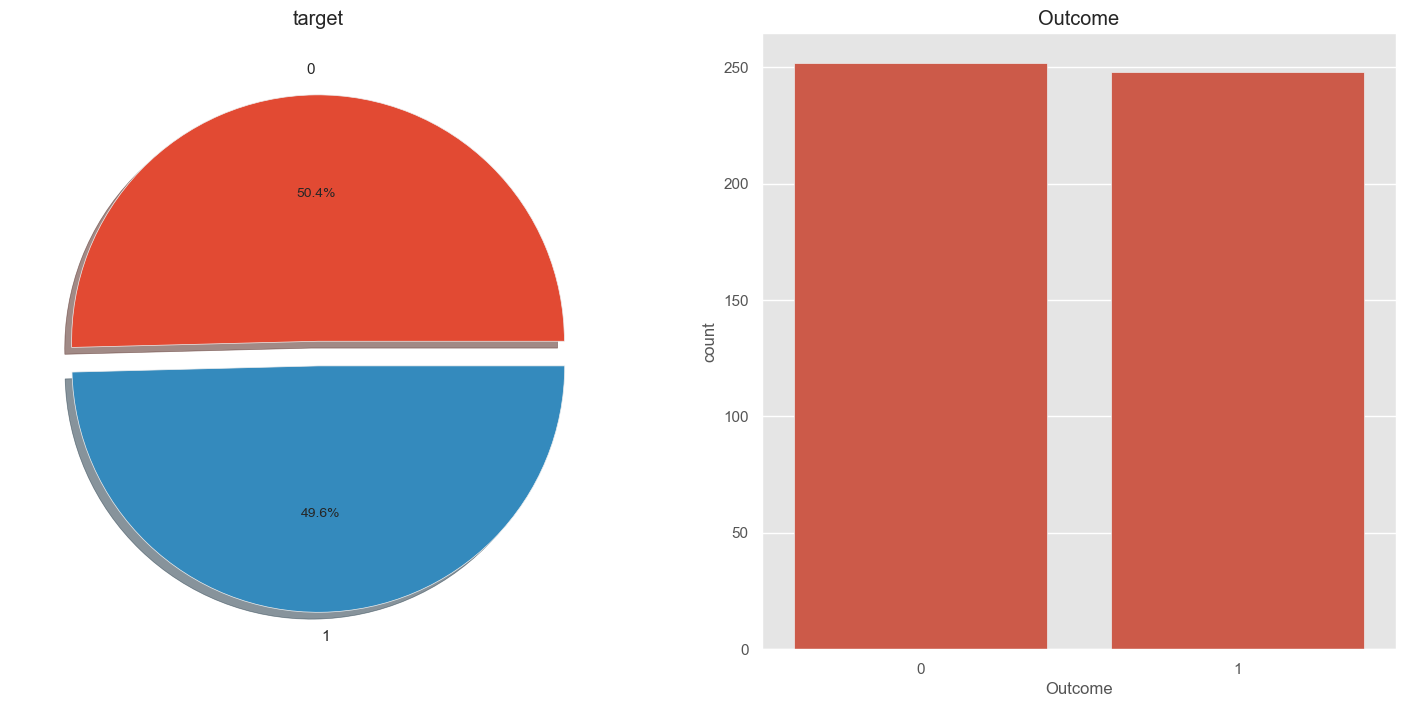

In [37]:
# Homework
# 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
#     groupby-> mean/max
# 0>healthy
# 1>diabetes

f,ax = plt.subplots(1,2, figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct = "%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [20]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.031052       0.004038      -0.045121   
Glucose                      0.031052  1.000000      -0.045608       0.037989   
BloodPressure                0.004038 -0.045608       1.000000      -0.029082   
SkinThickness               -0.045121  0.037989      -0.029082       1.000000   
Insulin                     -0.040885 -0.019196      -0.004016      -0.005733   
BMI                         -0.050759  0.028598       0.026314       0.032230   
DiabetesPedigreeFunction    -0.011033  0.026627      -0.033111       0.035654   
Age                          0.075400 -0.012601      -0.062707      -0.077441   
Outcome                      0.057022  0.034276       0.051089      -0.039381   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.040885 -0.050759                 -0.011033   
Glucose                  -0.019196  0.028598                  0.026627   
BloodPressure            -0.004016  0.026314                 -0.033111   
SkinThickness            -0.005733  0.032230                  0.035654   
Insulin                   1.000000 -0.034353                  0.006524   
BMI                      -0.034353  1.000000                 -0.037387   
DiabetesPedigreeFunction  0.006524 -0.037387                  1.000000   
Age                       0.001889  0.017403                 -0.056627   
Outcome                  -0.040764  0.035246                 -0.033435   

                               Age   Outcome  
Pregnancies               0.075400  0.057022  
Glucose                  -0.012601  0.034276  
BloodPressure            -0.062707  0.051089  
SkinThickness            -0.077441 -0.039381  
Insulin                   0.001889 -0.040764  
BMI                       0.017403  0.035246  
DiabetesPedigreeFunction -0.056627 -0.033435  
Age                       1.000000 -0.000370  
Outcome                  -0.000370  1.000000

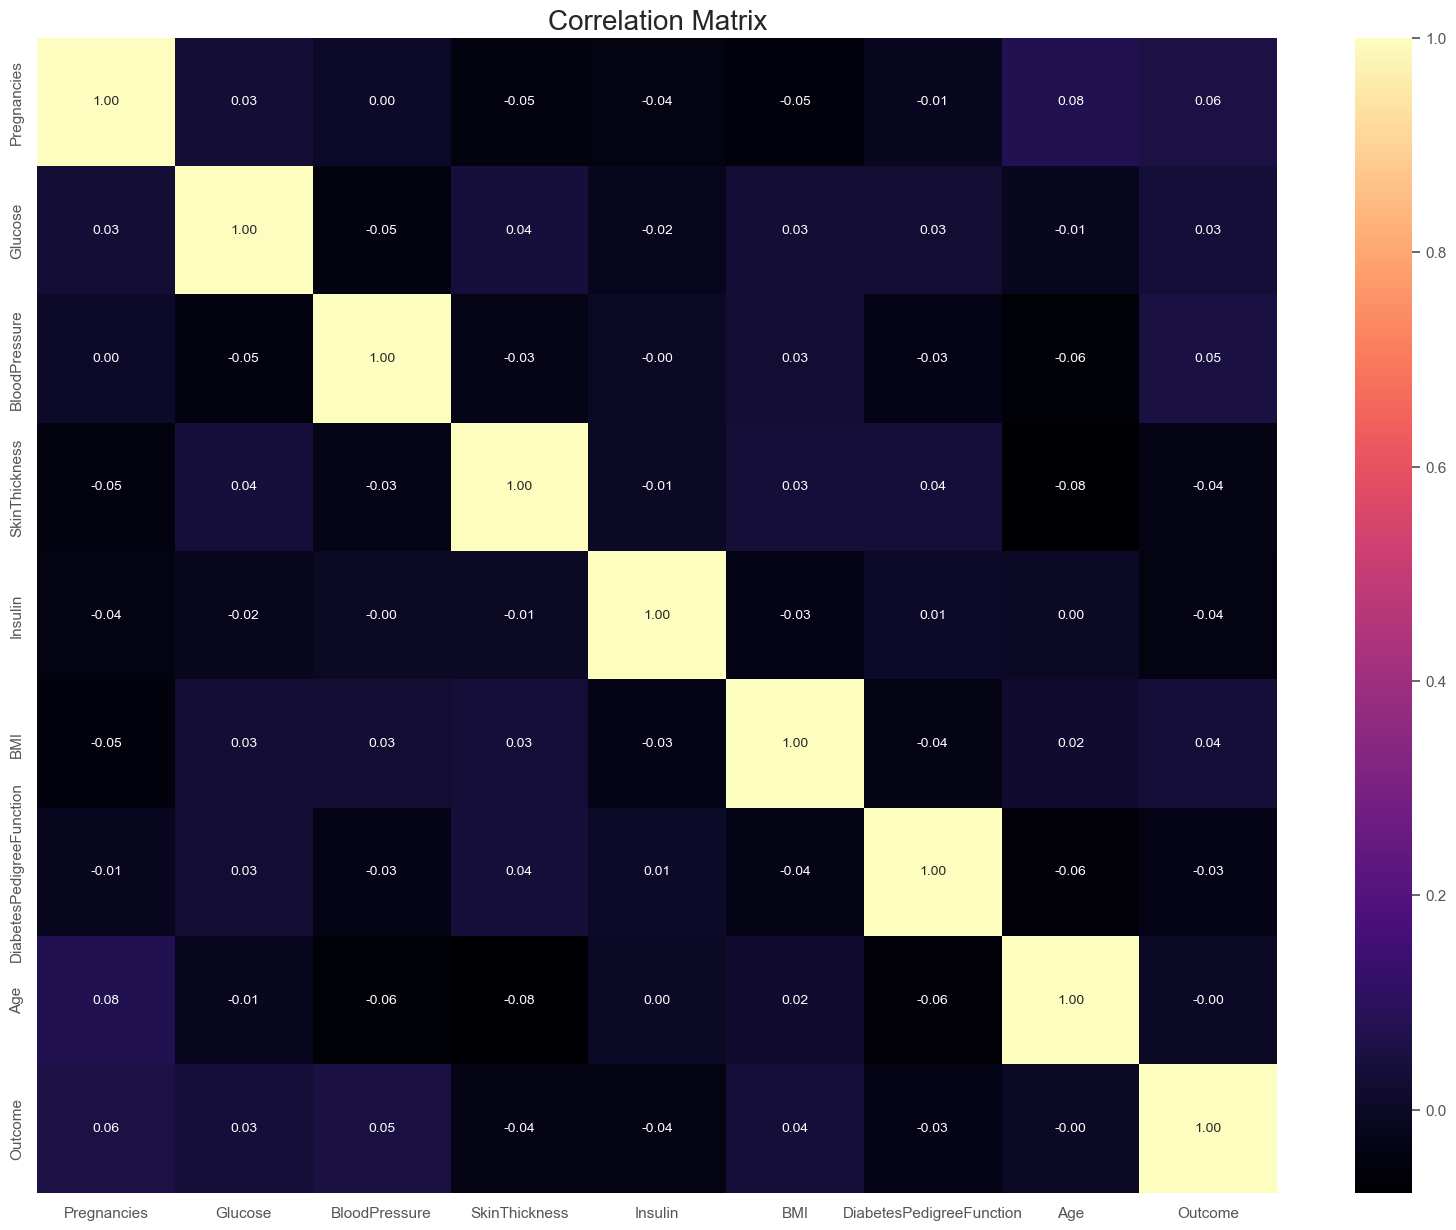

In [21]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [22]:
# EDA Part Completed
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.nan)

In [24]:
# Data preprocessing Part
df.isnull().sum()

Pregnancies                 43
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [25]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      119            106             21       35  19.3   
1          3.0       82             76             45      121  42.4   
2         12.0      129            104             44      131  42.6   
3         14.0      126             82             21      138  39.1   
4         10.0      105            117             16      217  18.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.32   60        1  
1                      1.91   39        0  
2                      1.28   73        0  
3                      0.83   21        0  
4                      1.28   25        0

In [34]:
%pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [38]:
import missingno as msno # type: ignore
msno.bar(df, color="orange")

<Axes: >

In [32]:
#median
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [33]:
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      119          106.0             21     35.0  19.3   
1          3.0       82           76.0             45    121.0  42.4   
2         12.0      129          104.0             44    131.0  42.6   
3         14.0      126           82.0             21    138.0  39.1   
4         10.0      105          117.0             16    217.0  18.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.32   60        1  
1                      1.91   39        0  
2                      1.28   73        0  
3                      0.83   21        0  
4                      1.28   25        0

In [ ]:

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

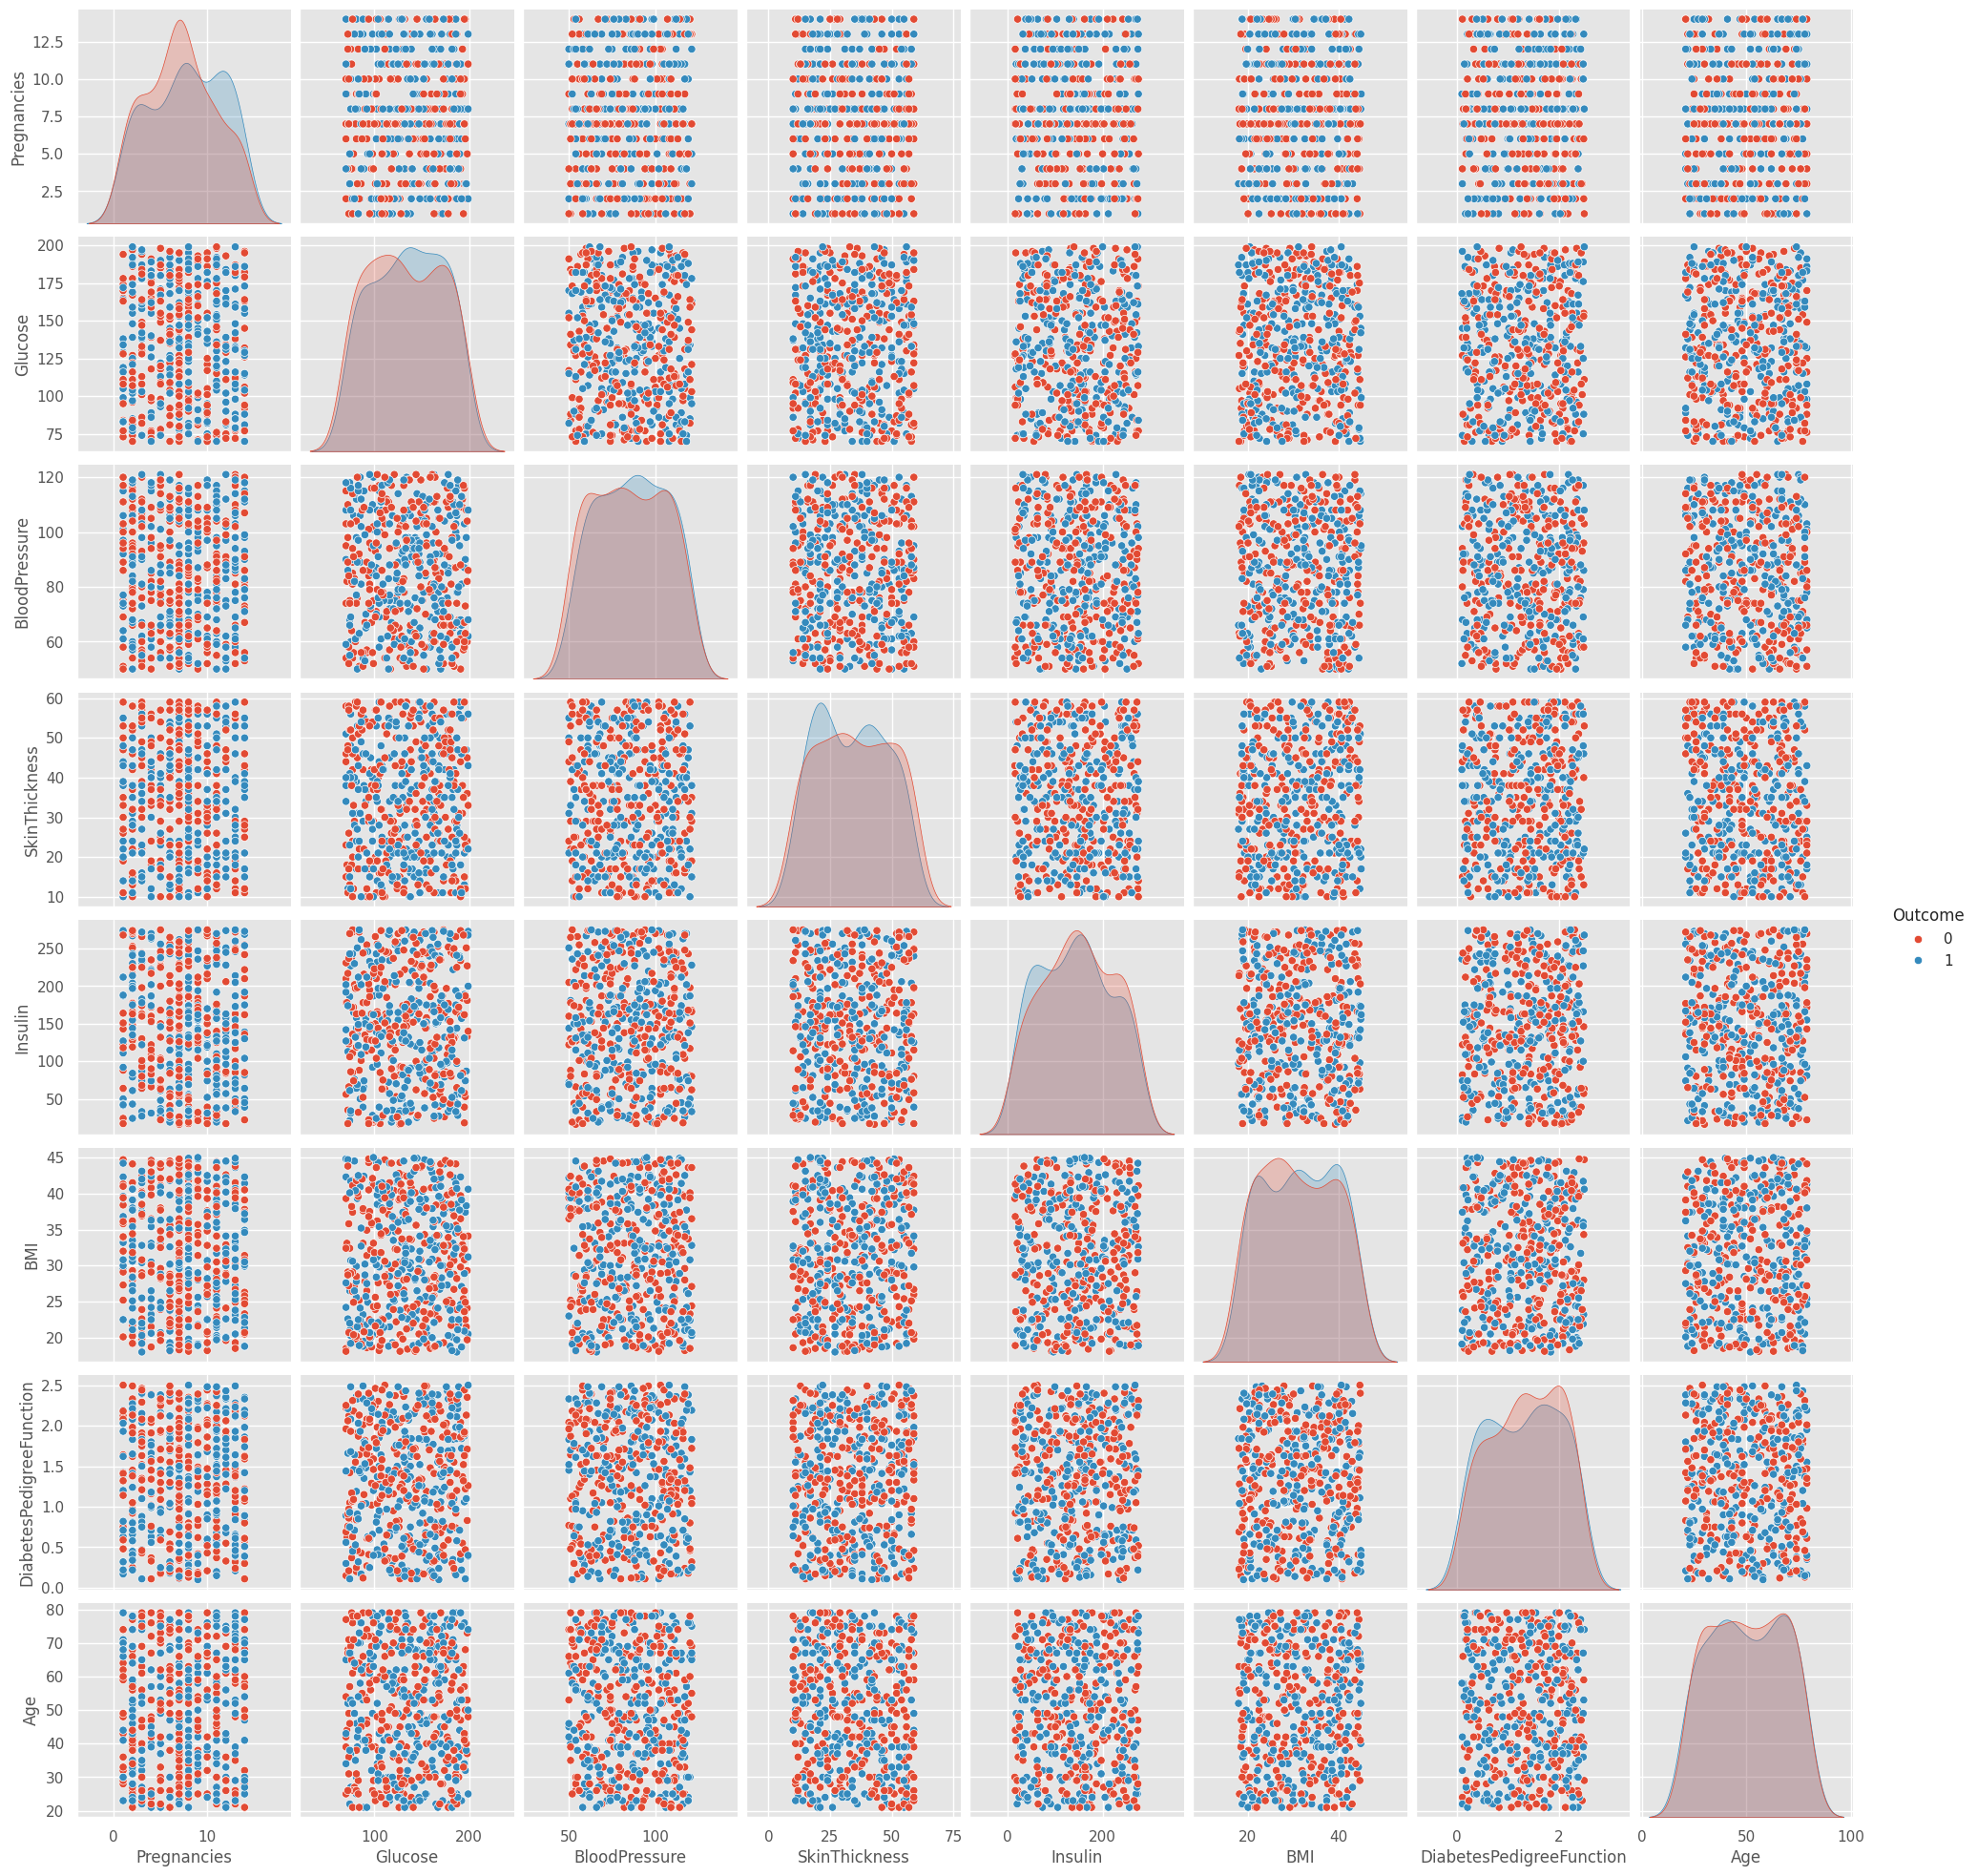

In [ ]:
# pair plot
p = sns.pairplot(df, hue="Outcome")

In [ ]:
# Outlier Detection
# IQR+Q1
# 50%
# 24.65->25%+50%
# 24.65->25%
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies no
Glucose no
BloodPressure no
SkinThickness no
Insulin no
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


<Axes: xlabel='Insulin'>

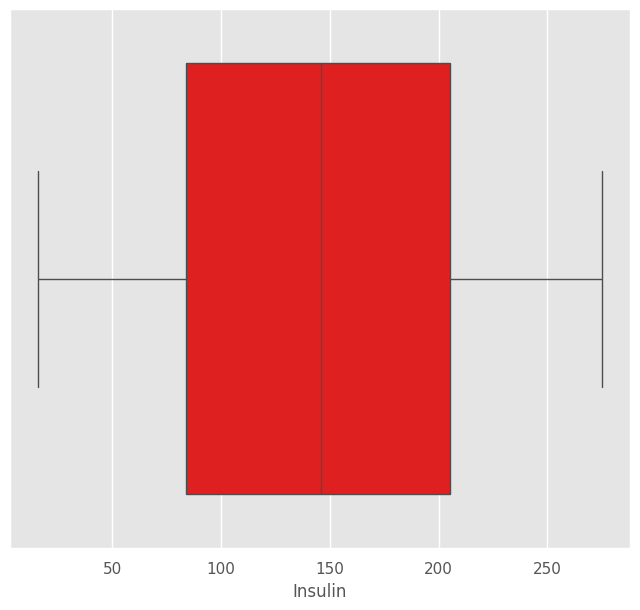

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

In [ ]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Insulin']>upper, "Insulin"] = upper

<Axes: xlabel='Insulin'>

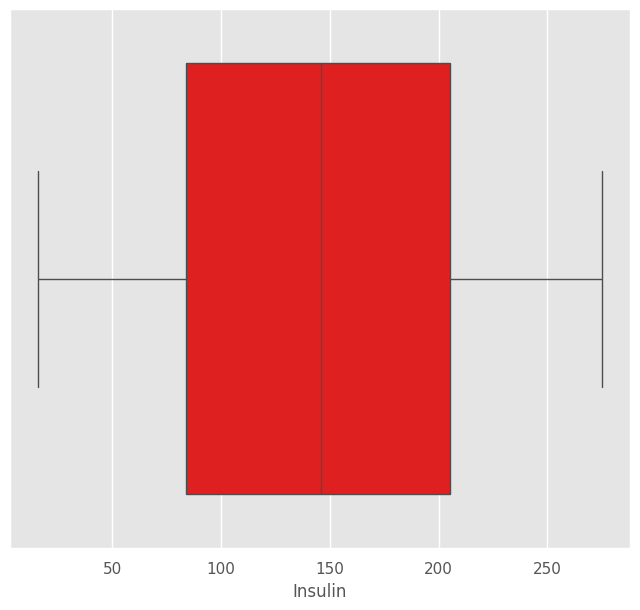

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

In [ ]:
# LOF
# local outlier factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      119          106.0             21     35.0  19.3   
1          3.0       82           76.0             45    121.0  42.4   
2         12.0      129          104.0             44    131.0  42.6   
3         14.0      126           82.0             21    138.0  39.1   
4         10.0      105          117.0             16    217.0  18.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.32   60        1  
1                      1.91   39        0  
2                      1.28   73        0  
3                      0.83   21        0  
4                      1.28   25        0

<Axes: xlabel='Pregnancies'>

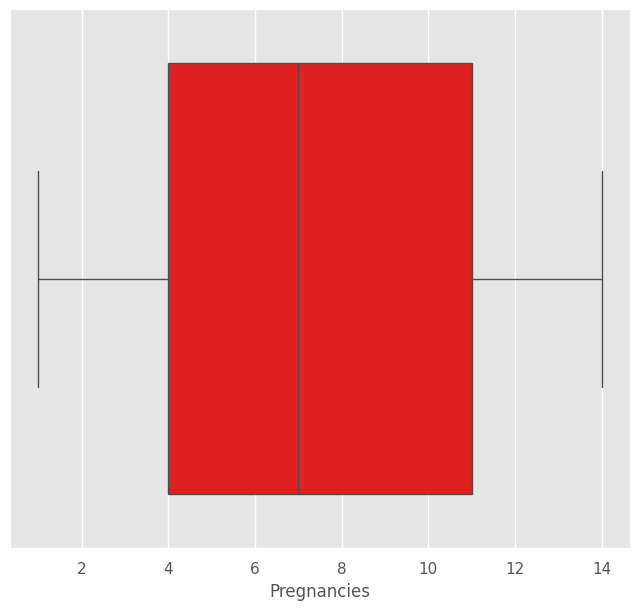

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Pregnancies"], color="red")

In [ ]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-1.24167297, -1.1747795 , -1.17400895, -1.16763841, -1.15117169,
       -1.14777605, -1.14623099, -1.14602606, -1.14069771, -1.13983832,
       -1.1392948 , -1.13288395, -1.12837407, -1.12226457, -1.12176665,
       -1.12042957, -1.12036509, -1.11974077, -1.11748195, -1.1159117 ])

In [ ]:
thresold = np.sort(df_scores)[7]

In [ ]:
thresold

np.float64(-1.1460260617931017)

In [ ]:
outliers = df_scores > thresold
df = df[outliers]

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      119          106.0             21     35.0  19.3   
1          3.0       82           76.0             45    121.0  42.4   
2         12.0      129          104.0             44    131.0  42.6   
3         14.0      126           82.0             21    138.0  39.1   
4         10.0      105          117.0             16    217.0  18.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.32   60        1  
1                      1.91   39        0  
2                      1.28   73        0  
3                      0.83   21        0  
4                      1.28   25        0

In [ ]:
df.shape

(492, 9)

<Axes: xlabel='Pregnancies'>

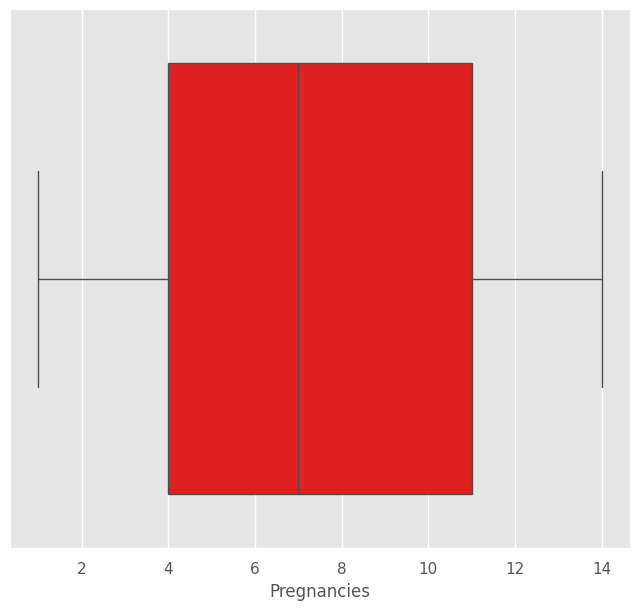

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Pregnancies"], color="red")

In [ ]:
# Feature Enginnering
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [ ]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight',
                         'Underweight']

In [ ]:
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      119          106.0             21     35.0  19.3   
1          3.0       82           76.0             45    121.0  42.4   
2         12.0      129          104.0             44    131.0  42.6   
3         14.0      126           82.0             21    138.0  39.1   
4         10.0      105          117.0             16    217.0  18.2   

   DiabetesPedigreeFunction  Age  Outcome     NewBMI  
0                      0.32   60        1  Obesity 2  
1                      1.91   39        0  Obesity 3  
2                      1.28   73        0  Obesity 3  
3                      0.83   21        0  Obesity 2  
4                      1.28   25        0  Obesity 2

In [ ]:
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [ ]:
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      119          106.0             21     35.0  19.3   
1          3.0       82           76.0             45    121.0  42.4   
2         12.0      129          104.0             44    131.0  42.6   
3         14.0      126           82.0             21    138.0  39.1   
4         10.0      105          117.0             16    217.0  18.2   

   DiabetesPedigreeFunction  Age  Outcome     NewBMI NewInsulinScore  
0                      0.32   60        1  Obesity 2          Normal  
1                      1.91   39        0  Obesity 3          Normal  
2                      1.28   73        0  Obesity 3          Normal  
3                      0.83   21        0  Obesity 2          Normal  
4                      1.28   25        0  Obesity 2        Abnormal

In [ ]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      119          106.0             21     35.0  19.3   
1          3.0       82           76.0             45    121.0  42.4   
2         12.0      129          104.0             44    131.0  42.6   
3         14.0      126           82.0             21    138.0  39.1   
4         10.0      105          117.0             16    217.0  18.2   

   DiabetesPedigreeFunction  Age  Outcome     NewBMI NewInsulinScore  \
0                      0.32   60        1  Obesity 2          Normal   
1                      1.91   39        0  Obesity 3          Normal   
2                      1.28   73        0  Obesity 3          Normal   
3                      0.83   21        0  Obesity 2          Normal   
4                      1.28   25        0  Obesity 2        Abnormal   

   NewGlucose  
0  Overweight  
1      Normal  
2      Secret  
3  Overweight  
4  Overweight

In [ ]:
# One hot encoding
df = pd.get_dummies(df, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      119          106.0             21     35.0  19.3   
1          3.0       82           76.0             45    121.0  42.4   
2         12.0      129          104.0             44    131.0  42.6   
3         14.0      126           82.0             21    138.0  39.1   
4         10.0      105          117.0             16    217.0  18.2   

   DiabetesPedigreeFunction  Age  Outcome  NewBMI_Obesity 1  NewBMI_Obesity 2  \
0                      0.32   60        1             False              True   
1                      1.91   39        0             False             False   
2                      1.28   73        0             False             False   
3                      0.83   21        0             False              True   
4                      1.28   25        0             False              True   

   NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Underweight  \
0             False              False               False   
1              True              False               False   
2              True              False               False   
3             False              False               False   
4             False              False               False   

   NewInsulinScore_Normal  NewGlucose_Low  NewGlucose_Normal  \
0                    True           False              False   
1                    True           False               True   
2                    True           False              False   
3                    True           False              False   
4                   False           False              False   

   NewGlucose_Overweight  NewGlucose_Secret  
0                   True              False  
1                  False              False  
2                  False               True  
3                   True              False  
4                   True              False

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [ ]:
categorical_df = df[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [ ]:
categorical_df.head()

NewBMI_Obesity 1  NewBMI_Obesity 2  NewBMI_Obesity 3  NewBMI_Overweight  \
0             False              True             False              False   
1             False             False              True              False   
2             False             False              True              False   
3             False              True             False              False   
4             False              True             False              False   

   NewBMI_Underweight  NewInsulinScore_Normal  NewGlucose_Low  \
0               False                    True           False   
1               False                    True           False   
2               False                    True           False   
3               False                    True           False   
4               False                   False           False   

   NewGlucose_Normal  NewGlucose_Overweight  NewGlucose_Secret  
0              False                   True              False  
1               True                  False              False  
2              False                  False               True  
3              False                   True              False  
4              False                   True              False

In [ ]:
y=df['Outcome']
X=df.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)

In [ ]:
cols = X.columns
index = X.index

In [ ]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      119          106.0             21     35.0  19.3   
1          3.0       82           76.0             45    121.0  42.4   
2         12.0      129          104.0             44    131.0  42.6   
3         14.0      126           82.0             21    138.0  39.1   
4         10.0      105          117.0             16    217.0  18.2   

   DiabetesPedigreeFunction  Age  
0                      0.32   60  
1                      1.91   39  
2                      1.28   73  
3                      0.83   21  
4                      1.28   25

In [ ]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [ ]:
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.142857 -0.221344       0.567376          -0.52 -0.909836 -0.827094   
1    -0.571429 -0.806324      -0.283688           0.44 -0.204918  0.819964   
2     0.714286 -0.063241       0.510638           0.40 -0.122951  0.834225   
3     1.000000 -0.110672      -0.113475          -0.52 -0.065574  0.584670   
4     0.428571 -0.442688       0.879433          -0.72  0.581967 -0.905526   

   DiabetesPedigreeFunction       Age  
0                 -0.909091  0.333333  
1                  0.435518 -0.366667  
2                 -0.097252  0.766667  
3                 -0.477801 -0.966667  
4                 -0.097252 -0.833333

In [ ]:
X = pd.concat([X, categorical_df], axis=1)

In [ ]:
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.142857 -0.221344       0.567376          -0.52 -0.909836 -0.827094   
1    -0.571429 -0.806324      -0.283688           0.44 -0.204918  0.819964   
2     0.714286 -0.063241       0.510638           0.40 -0.122951  0.834225   
3     1.000000 -0.110672      -0.113475          -0.52 -0.065574  0.584670   
4     0.428571 -0.442688       0.879433          -0.72  0.581967 -0.905526   

   DiabetesPedigreeFunction       Age  NewBMI_Obesity 1  NewBMI_Obesity 2  \
0                 -0.909091  0.333333             False              True   
1                  0.435518 -0.366667             False             False   
2                 -0.097252  0.766667             False             False   
3                 -0.477801 -0.966667             False              True   
4                 -0.097252 -0.833333             False              True   

   NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Underweight  \
0             False              False               False   
1              True              False               False   
2              True              False               False   
3             False              False               False   
4             False              False               False   

   NewInsulinScore_Normal  NewGlucose_Low  NewGlucose_Normal  \
0                    True           False              False   
1                    True           False               True   
2                    True           False              False   
3                    True           False              False   
4                   False           False              False   

   NewGlucose_Overweight  NewGlucose_Secret  
0                   True              False  
1                  False              False  
2                  False               True  
3                   True              False  
4                   True              False

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Machine Learning Algo
# Logistic Regreesion
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)
accuracy_score(y_train, log_reg.predict(X_train))

0.5699745547073791

In [ ]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
confusion_matrix(y_test, y_pred)

array([[20, 34],
       [15, 30]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.37      0.45        54
           1       0.47      0.67      0.55        45

    accuracy                           0.51        99
   macro avg       0.52      0.52      0.50        99
weighted avg       0.52      0.51      0.50        99



In [ ]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(accuracy_score(y_test, knn.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7073791348600509
0.48484848484848486
[[23 31]
 [20 25]]
              precision    recall  f1-score   support

           0       0.53      0.43      0.47        54
           1       0.45      0.56      0.50        45

    accuracy                           0.48        99
   macro avg       0.49      0.49      0.48        99
weighted avg       0.49      0.48      0.48        99



In [ ]:
# SVM
svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [ ]:
# best_parameter
grid_search.best_params_

{'C': 15, 'gamma': 0.1}

In [ ]:
grid_search.best_score_

np.float64(0.5216163583252191)

In [ ]:
svc = SVC(C=10, gamma = 0.01, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(accuracy_score(y_test, svc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6412213740458015
0.5555555555555556
[[24 30]
 [14 31]]
              precision    recall  f1-score   support

           0       0.63      0.44      0.52        54
           1       0.51      0.69      0.58        45

    accuracy                           0.56        99
   macro avg       0.57      0.57      0.55        99
weighted avg       0.58      0.56      0.55        99



In [ ]:
# Decision Tree
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))

print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


1.0
0.5050505050505051
[[25 29]
 [20 25]]
              precision    recall  f1-score   support

           0       0.56      0.46      0.51        54
           1       0.46      0.56      0.51        45

    accuracy                           0.51        99
   macro avg       0.51      0.51      0.51        99
weighted avg       0.51      0.51      0.51        99



In [ ]:
# hyperparameter tuning of dt
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['auto','sqrt','log2']
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']},
             verbose=1)

In [ ]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
DT = grid_search_dt.best_estimator_
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))
dt_acc = accuracy_score(y_test, DT.predict(X_test))
print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7531806615776081
0.5454545454545454
[[30 24]
 [21 24]]
              precision    recall  f1-score   support

           0       0.59      0.56      0.57        54
           1       0.50      0.53      0.52        45

    accuracy                           0.55        99
   macro avg       0.54      0.54      0.54        99
weighted avg       0.55      0.55      0.55        99



In [ ]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [ ]:
y_pred = rand_clf.predict(X_test)

In [ ]:
y_pred = rand_clf.predict(X_test)
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(accuracy_score(y_test, rand_clf.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.5858585858585859
[[26 28]
 [13 32]]
              precision    recall  f1-score   support

           0       0.67      0.48      0.56        54
           1       0.53      0.71      0.61        45

    accuracy                           0.59        99
   macro avg       0.60      0.60      0.58        99
weighted avg       0.61      0.59      0.58        99



In [ ]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [ ]:
grid_search_gbc.best_score_

np.float64(0.523974358974359)

In [ ]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=150)

In [ ]:
gbc = grid_search_gbc.best_estimator_
y_pred = gbc.predict(X_test)
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(accuracy_score(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9491094147582697
0.5656565656565656
[[24 30]
 [13 32]]
              precision    recall  f1-score   support

           0       0.65      0.44      0.53        54
           1       0.52      0.71      0.60        45

    accuracy                           0.57        99
   macro avg       0.58      0.58      0.56        99
weighted avg       0.59      0.57      0.56        99



In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=180,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb.predict(X_test)
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(accuracy_score(y_test, xgb.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.5757575757575758
[[25 29]
 [13 32]]
              precision    recall  f1-score   support

           0       0.66      0.46      0.54        54
           1       0.52      0.71      0.60        45

    accuracy                           0.58        99
   macro avg       0.59      0.59      0.57        99
weighted avg       0.60      0.58      0.57        99



In [ ]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dt_acc,4), 100*round(rand_acc,4),
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

Model  Score
4      Random Forest Classifier  58.59
6                       XgBoost  57.58
5  Gradient Boosting Classifier  56.57
2                           SVM  55.56
3      Decision Tree Classifier  54.55
0           Logistic Regression  50.51
1                           KNN  48.48

In [ ]:
import pickle
model = gbc_acc
pickle.dump(model, open("diabetes.pkl",'wb'))

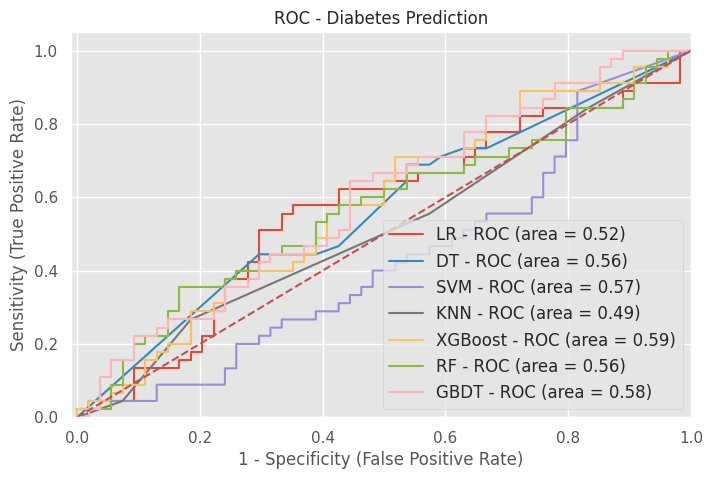

In [ ]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[50.51, 54.55, 55.559999999999995, 48.480000000000004, 57.58, 58.589999999999996, 56.57]
[np.float64(51.849999999999994), np.float64(51.480000000000004), np.float64(56.67), np.float64(49.07), np.float64(58.699999999999996), np.float64(58.15), np.float64(50.56)]


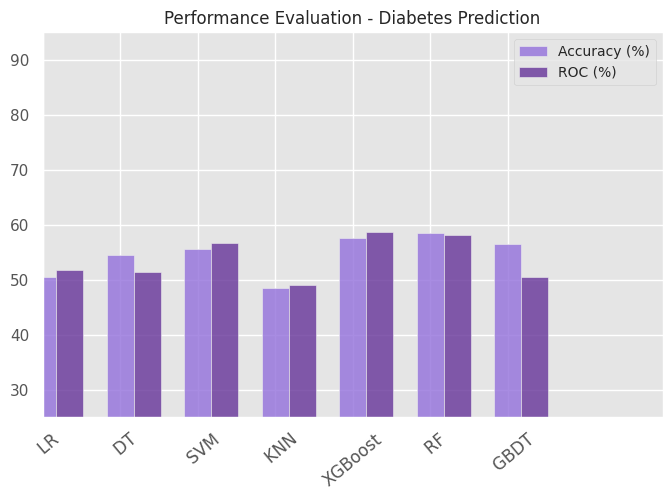

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(dt_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4),
                  100*round(rand_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([0, 8])
plt.ylim([25, 95])

plt.title('Performance Evaluation - Diabetes Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()